In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
sys.path.append("../../../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines
import plotTools as ptools
import utils
import importlib
import coffea.util as util
import time
import json
import os
import glob
import pandas as pd
import mplhep as hep

### Import coffea files

In [2]:
prefix = './coffea/'
suffix = '_noNJetCut_good_vtx_v7'

In [3]:
bkg_histo = util.load(f'{prefix}/background_VR{suffix}.coffea')[0]

In [4]:
data_histo = util.load(f'{prefix}/data_VR{suffix}.coffea')[0]

In [5]:
sig_histo = util.load(f'{prefix}/signal_VR{suffix}.coffea')[0]

In [6]:
utils.get_signal_list_of_cuts(sig_histo)

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 2.0',
 'm(e,e) > 20']

### Efficiency

In [7]:
df_signal = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
df_signal

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2.0","m(e,e) > 20"
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,4.551906,1.518300,1.301035,1.272030,1.271698,1.271698,0.002334
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.169919,0.062150,0.053140,0.051398,0.051384,0.051384,0.000212
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.169096,21.139565,18.091268,17.613567,17.601119,17.601119,0.062246
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,3.457686,1.872432,1.606567,1.566595,1.566295,1.566295,0.004340
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,4.388476,2.336541,1.986136,1.933916,1.933916,1.933916,0.006323
...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,34.024574,16.523260,14.146625,13.748684,13.738309,13.738309,0.064188
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,22229.424481,7509.669649,6363.256495,6180.099042,6180.099042,6180.099042,28.275495
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,928.485665,412.639573,345.944497,336.653776,336.653776,336.653776,1.052870
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,3.593473,1.254348,1.078145,1.049028,1.048590,1.048590,0.002189


In [8]:
df_signal = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')
df_signal

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2.0","m(e,e) > 20"
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,1.0,0.946658,0.946972,0.948124,0.948371,0.948371,0.000000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,1.0,0.950090,0.951754,0.951771,0.951758,0.951758,0.066943
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,1.0,0.967176,0.968010,0.967761,0.967738,0.967738,0.024976
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,1.0,0.969219,0.969158,0.969421,0.969511,0.969511,0.069288
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,1.0,0.972248,0.973729,0.974654,0.974654,0.974654,0.000000
...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,1.0,0.965392,0.967194,0.967300,0.967275,0.967275,0.128962
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,1.0,0.955555,0.955669,0.955873,0.955873,0.955873,0.000000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,1.0,0.961643,0.960336,0.962376,0.962376,0.962376,0.000000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,1.0,0.950438,0.953913,0.953465,0.953654,0.953654,0.000000


In [9]:
df_bkg = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
df_bkg

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2.0","m(e,e) > 20"
ZGamma,1441.216675,48.514784,38.407152,33.382019,28.425957,27.600565,5.122883
Top,16261.614716,336.876477,178.505912,164.604193,158.504140,158.411884,31.447864
DY,3992.005007,135.972223,97.621083,94.134616,94.134616,94.134616,27.891738
ZJets,49609.778111,948.634456,711.674334,676.700544,671.681975,665.176590,26.263252
QCD,46821.466983,502.927577,165.232114,133.776643,133.776643,126.349412,16.831520
WJets,169626.376667,2336.520314,1661.429859,1585.961395,1577.464638,1560.644172,235.377289
Multiboson,4362.918747,63.913088,39.552573,35.962480,34.574145,33.530431,6.218294
Total,292115.376907,4373.358920,2892.423027,2724.521891,2698.562113,2665.847671,349.152841


In [11]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['m(e,e) > 20']).transpose(), pd.DataFrame(bkg_cts_raw_df['m(e,e) > 20']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,ZGamma,Top,DY,ZJets,QCD,WJets,Multiboson,Total
Weighted Counts,5.12,31.45,27.89,26.26,16.83,235.38,6.22,349.15
Raw Counts,27.00,82.00,8.00,262.00,3.00,945.00,39.00,"1,366.00"


In [12]:
pd.options.display.float_format = '{:,.1f}'.format

utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2.0","m(e,e) > 20"
data_2018_Data_MET_UL18_Run2018D,"307,259.0","6,288.0","3,272.0","2,500.0","2,465.0","2,434.0",438.0
data_2018_Data_MET_UL18_Run2018B,"61,151.0","1,185.0",632.0,444.0,436.0,431.0,60.0
data_2018_Data_MET_UL18_Run2018C,"69,359.0","1,517.0",781.0,576.0,569.0,560.0,116.0
data_2018_Data_MET_UL18_Run2018A,"118,155.0","2,356.0","1,110.0",749.0,738.0,727.0,107.0


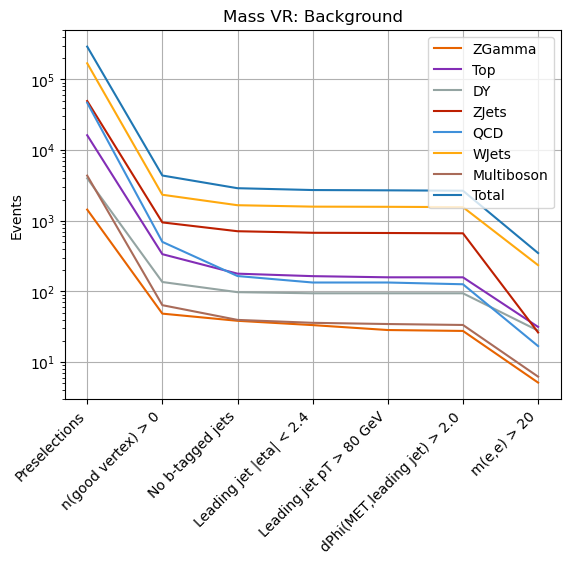

In [43]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

ptools.plot_bkg_efficiency(bkg_histo, df, doLog = True, ylabel = 'Events', title = 'Mass VR: Background')

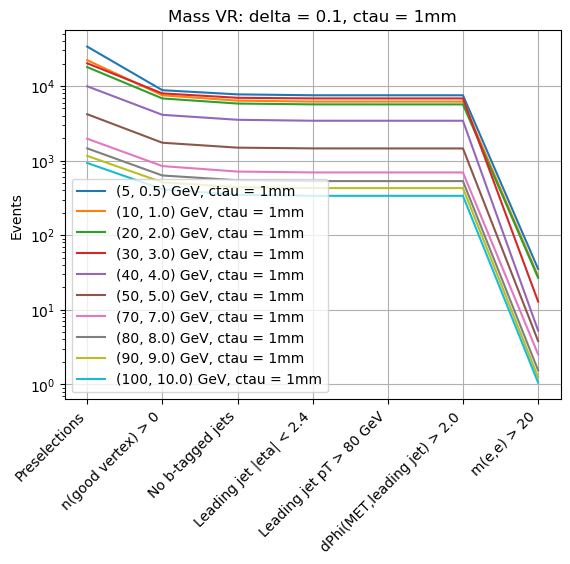

In [44]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [1]

title = f'Mass VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

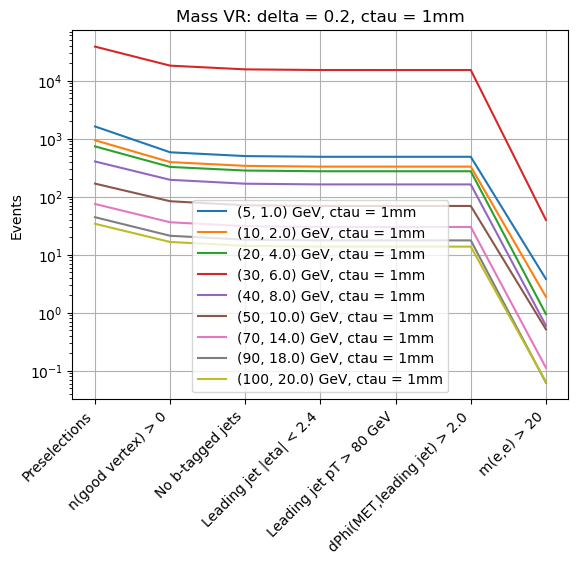

In [45]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [1]

title = f'Mass VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

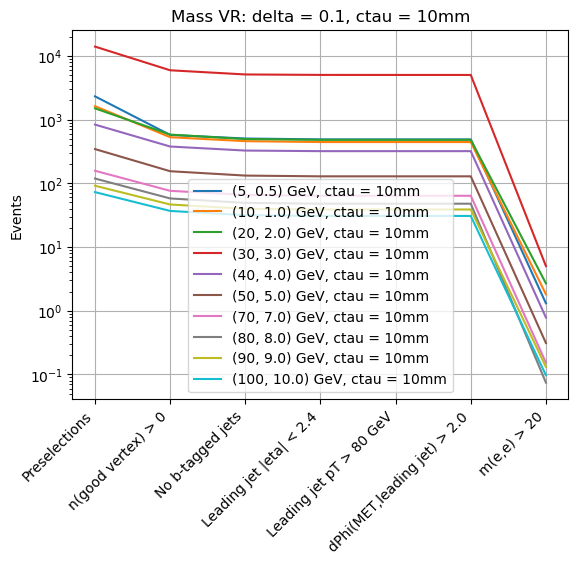

In [46]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [10]

title = f'Mass VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

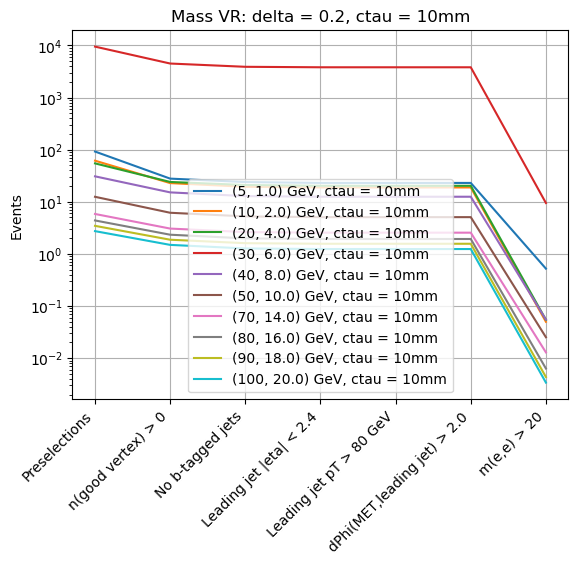

In [47]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [10]

title = f'Mass VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

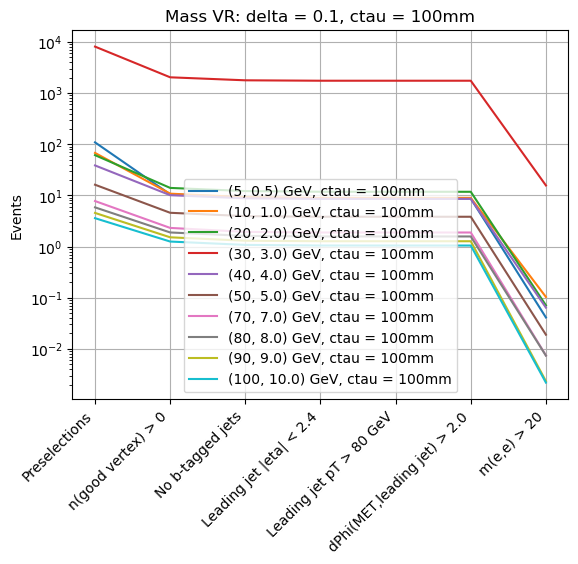

In [48]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [100]

title = f'Mass VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

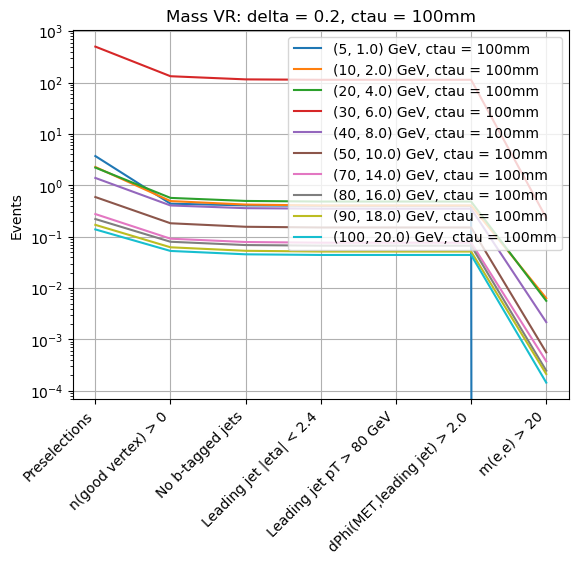

In [49]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [100]

title = f'Mass VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


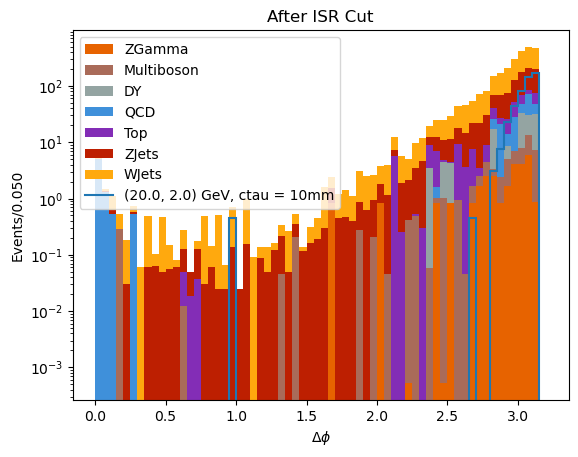

In [20]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'lead_jet_met_dPhi',
    'cut': 'cut7',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)

# signal points
m1s = [20]
deltas = [0.1]
ctaus = [10]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('After ISR Cut')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


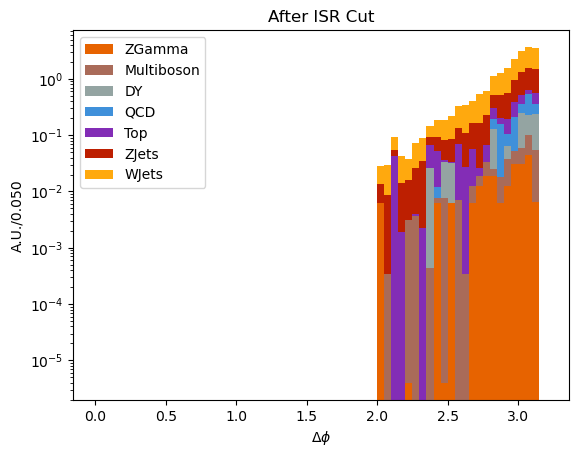

In [21]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'lead_jet_met_dPhi',
    'cut': 'cut8',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)

plt.title('After ISR Cut')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


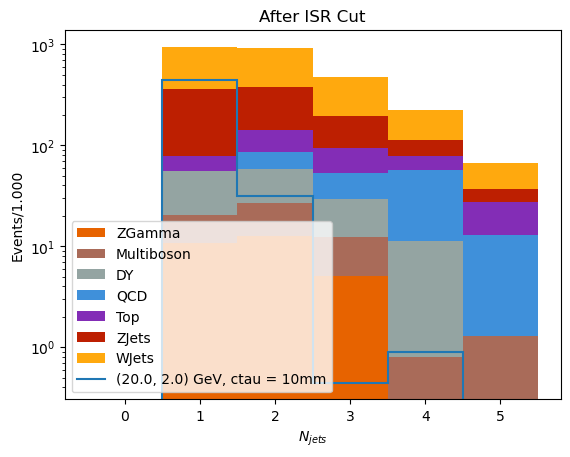

In [32]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nJets',
    'cut': 'cut8',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,6],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)


# signal points
m1s = [20]
deltas = [0.1]
ctaus = [10]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)


plt.title('After ISR Cut')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


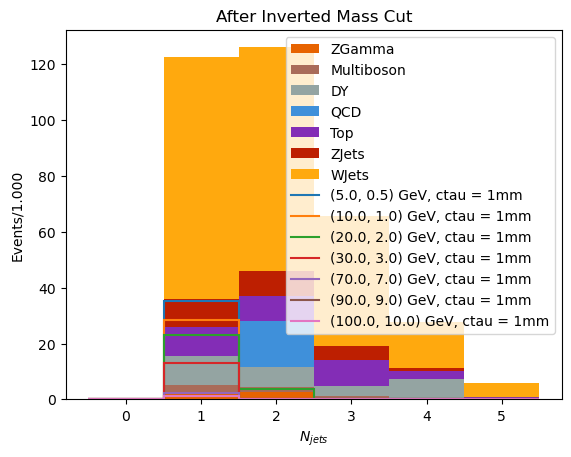

In [39]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nJets',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,6],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)


# signal points
m1s = [5, 10, 20, 30, 70, 90, 100]
deltas = [0.1]
ctaus = [1]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)


plt.title('After Inverted Mass Cut')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


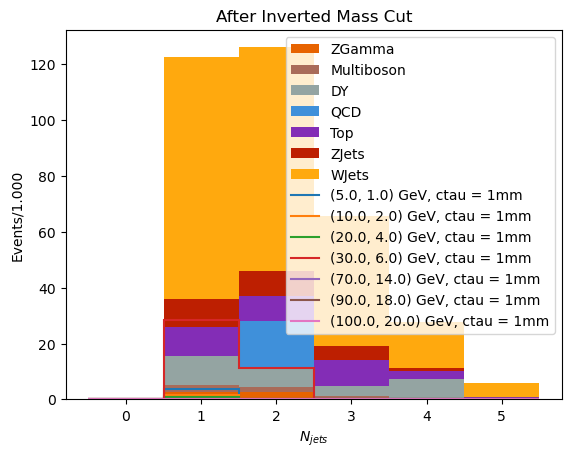

In [42]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nJets',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,6],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)


# signal points
m1s = [5, 10, 20, 30, 70, 90, 100]
deltas = [0.2]
ctaus = [1]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)


plt.title('After Inverted Mass Cut')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


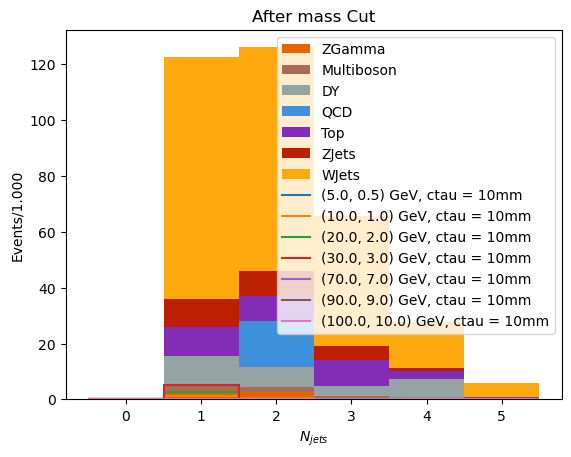

In [40]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nJets',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,6],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)


# signal points
m1s = [5, 10, 20, 30, 70, 90, 100]
deltas = [0.1]
ctaus = [10]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)


plt.title('After mass Cut')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


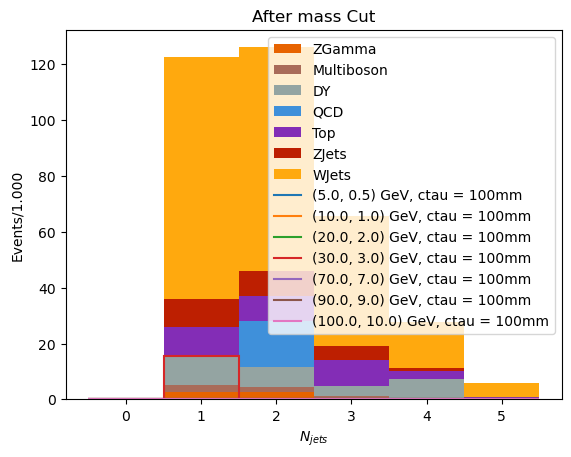

In [41]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nJets',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,6],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)


# signal points
m1s = [5, 10, 20, 30, 70, 90, 100]
deltas = [0.1]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)


plt.title('After mass Cut')
plt.legend()
plt.show()